In [1]:
import sqlite3
import pandas as pd 
import numpy as np 
import pandas as pd
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager ## import this when you want to automatically intall chrome driver 
from selenium.webdriver.chrome.service import Service  # this is used to give path of local driver or also used to install driver automatically 
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\harshit\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
desc=[]
loc=[]
sal=[]
company=[]

### Custom Functions  

In [3]:
def indeed_name_and_location():
    for i in table:
        company.append(i.find("span",class_="css-1x7z1ps eu4oa1w0").text)  ### company name 15
        if i.find("div",class_="css-t4u72d eu4oa1w0") == None:
            loc.append("NA")
        else:
            loc.append(i.find("div",class_="css-t4u72d eu4oa1w0").text)  ### location name 15


def indeed_job_salaries():
    for i in table:
        if i.find("div",class_="metadata salary-snippet-container")==None:
            sal.append("NA")
        else:
            sal.append(i.find("div",class_="metadata salary-snippet-container").text)


In [4]:
def glassdoor_name_and_location():
    for i in table1 :
        if i .find("div",class_="EmployerProfile_employerInfo__GaPbq") == None:
            glass_company.append("NA")
        else:
            glass_company.append(i .find("div",class_="EmployerProfile_employerInfo__GaPbq").text)
        if i.find("div",class_="JobCard_location__N_iYE") == None:
            glass_loc.append("NA")
        else:
            glass_loc.append(i.find("div",class_="JobCard_location__N_iYE").text)
            
            
def glassdoor_job_salaries():
    for i in table1:
        a=i.find("div",class_="JobCard_salaryEstimate___m9kY")
        if a==None:
            glass_sal.append("NA")
        else:
            glass_sal.append(a.text.strip("\xa0 and (Glassdoor Est.) or(Employer Est.)"))
            
def glassdoor_job_description():
    for i in table1:
        if i.find("div",class_="JobCard_jobDescriptionSnippet__HUIod") == None:
            glass_desc.append("None given")
        else:
            glass_desc.append(i.find("div",class_="JobCard_jobDescriptionSnippet__HUIod").text)

## Accessing site Ideed.com for data scientist role in delhi

In [8]:
s=Service("E:/chromedriver-win32 (1)/chromedriver-win32/chromedriver.exe")

browser=webdriver.Chrome(service=s)        # comment out this whole cell

In [10]:
# # s=Service(ChromeDriverManager().install())
# # browser=webdriver.Chrome(service = s)


# driver=webdriver.Chrome(service=Service(ChromeDriverManager().install()))

In [7]:
browser.get("https://in.indeed.com/jobs?q=data+scientist&l=delhi&vjk=61ed5f8b9391e16b")  # indeed jobs 
soup=BeautifulSoup(browser.page_source,"lxml")

## Finding company names and location

In [8]:
table=soup.find_all("table",class_="jobCard_mainContent big6_visualChanges")

In [9]:
indeed_name_and_location()

## Findng job description


In [10]:
for i in soup.find_all("div",class_="job-snippet") :
    desc.append(i.text.strip("\n"))### description name 15

## Finding job salaries

In [11]:
indeed_job_salaries()

### Indeed job postings

In [12]:
data={"Company Name":company,"Location":loc,"Job Description":desc,"Salary":sal}
indeed_df=pd.DataFrame(data)

In [13]:
indeed_df

,Company Name,Location,Job Description,Salary
0,Boston Consulting Group,"New Delhi, Delhi","Build data pipelines, ingestion of structured ...",NA
1,Donivia Overseas Pvt. Ltd.,"New Delhi, Delhi",Experience using data visualization tools.\nRe...,NA
2,Maruti Suzuki India Ltd,"New Delhi, Delhi","Data preparation, make sense of data from mult...",NA
3,Boston Consulting Group,"New Delhi, Delhi","The LDS is expected to provide mentoring, coac...",NA
4,SmartHelio,"New Delhi, Delhi",Join our team as an experienced data scientist...,NA
5,Naviga Inc.,"Hybrid remote in New Delhi, Delhi","Given a business problem, estimate solution fe...",NA
6,Shyam Engg,"Delhi, Delhi",Data Science expert with Good knowledge of Pow...,"₹13,000 - ₹17,000 a month"
7,Blue Data Consulting,"Delhi, Delhi",Utilize Python programming for data manipulati...,"₹40,000 - ₹60,000 a month"
8,Insider Biz,"New Delhi, Delhi",Insider Biz is a highly innovative and fast pa...,NA
9,ARMMAN,"New Delhi, Delhi",Assess effectiveness and accuracy of data sour...,NA


# Finding job postings on Glassdoor

In [14]:
browser.get("https://www.glassdoor.co.in/Job/delhi-data-scientist-jobs-SRCH_IL.0,5_IS4937_KO6,20.htm")
soupn=BeautifulSoup(browser.page_source,"lxml")

In [15]:
glass_desc=[]
glass_loc=[]
glass_sal=[]
glass_company=[]


## Company names and locations from Glassdoor 

In [16]:
table1=soupn.find_all("li",class_="JobsList_jobListItem__JBBUV")
glassdoor_name_and_location()

### Finding job salraies

In [17]:
glassdoor_job_salaries()

### Finding job description

In [18]:
glassdoor_job_description()

### Glass door job postings

In [19]:
data={"Company Name":glass_company,"Location":glass_loc,"Job Description":glass_desc,"Salary":glass_sal}
glass_df=pd.DataFrame(data)

In [20]:
glass_df

,Company Name,Location,Job Description,Salary
0,SmartHelio,New Delhi,Join our team as an experienced data scientist...,₹3L - ₹7L
1,Insider Biz,New Delhi,India's leading companies and governments rely...,NA
2,GetMyUni3.6,New Delhi,"To apply to data sets, create bespoke data mod...",₹3L - ₹7L
3,Dignitas Digital4.2,New Delhi,Location – New Delhi Seeking Pro Bono Data Sci...,₹3L - ₹5L
4,Naviga Inc.3.8,New Delhi,In an industry that is constantly on the move ...,₹5L - ₹10L
5,Eoraa & Co.,New Delhi,Proficient with Python/R. Strong communication...,₹3L - ₹7L
6,iGloble Solutions,Kālkāji Devi,3-5 years of experience. Experience in data an...,₹4L - ₹7L
7,Maruti Suzuki India Ltd3.9,New Delhi,Ability to create and gain buy-in for novel id...,₹4L
8,KnowDis4.3,New Delhi,KnowDis is looking for Data Science and Machin...,₹3L - ₹7L
9,Deloitte4.1,Delhi,"Exploring data to gain an understanding of it,...",NA


# Combined job postings in one DataFrame

In [21]:
jobs=pd.concat([indeed_df,glass_df])

In [22]:
jobs[["Company Name","Location","Job Description","Salary"]]

,Company Name,Location,Job Description,Salary
0,Boston Consulting Group,"New Delhi, Delhi","Build data pipelines, ingestion of structured ...",NA
1,Donivia Overseas Pvt. Ltd.,"New Delhi, Delhi",Experience using data visualization tools.\nRe...,NA
2,Maruti Suzuki India Ltd,"New Delhi, Delhi","Data preparation, make sense of data from mult...",NA
3,Boston Consulting Group,"New Delhi, Delhi","The LDS is expected to provide mentoring, coac...",NA
4,SmartHelio,"New Delhi, Delhi",Join our team as an experienced data scientist...,NA
5,Naviga Inc.,"Hybrid remote in New Delhi, Delhi","Given a business problem, estimate solution fe...",NA
6,Shyam Engg,"Delhi, Delhi",Data Science expert with Good knowledge of Pow...,"₹13,000 - ₹17,000 a month"
7,Blue Data Consulting,"Delhi, Delhi",Utilize Python programming for data manipulati...,"₹40,000 - ₹60,000 a month"
8,Insider Biz,"New Delhi, Delhi",Insider Biz is a highly innovative and fast pa...,NA
9,ARMMAN,"New Delhi, Delhi",Assess effectiveness and accuracy of data sour...,NA


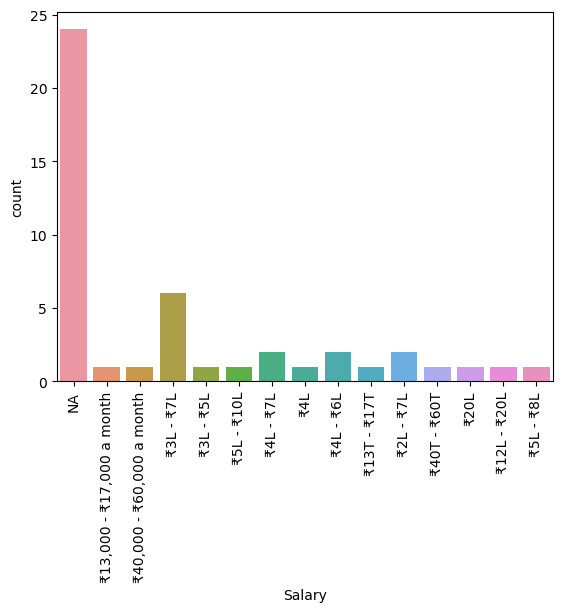

In [23]:
sns.countplot(data=jobs,x="Salary")
plt.xticks(rotation="vertical")
plt.show()

    -We can simply see that there are various companies which are offering jobs are not disclosing the salaries offered
    - There are a lot of companies which are offering 5-7 lakh package for the hiring
    

## Summary

    Using this web scrapping project we can observe that there are a good chunk of job postings of the field Data Science   specially of Data anlyst in only the region near to the captial of INDIA Delhi. The salary offered for this role is also quite good ranging from 3 lakh a year to 20 lakhs a year as per your experience .It is also mentioned in description of many companies that other softwares like Power BI , Tableau ans SQL are additional skills to have and are also very     helpful in securing a job for yourself. So at last i would like to add that it is very safe to say that this Data        Science field is offering a number of jobs with a good amount of salaries so a person can think of persuing his/her      career in this field 

In [24]:
browser.quit()